In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


# Introduction to Graph Theory

Graph theory is the study of graphs, where graphs are mathematical structures that model pairwise relations between objects. The way that we related these objects are with vertices and edges, where our objects are our vertices and the relations are the edges. A key example is a family tree. Our vertices would be each person in the family, and the edges would be the relation. So if we have the following family tree: 

<img src="Diagrams/familyTree.jpg">

We can express this family tree as a simplified graph tree, which would look like this:

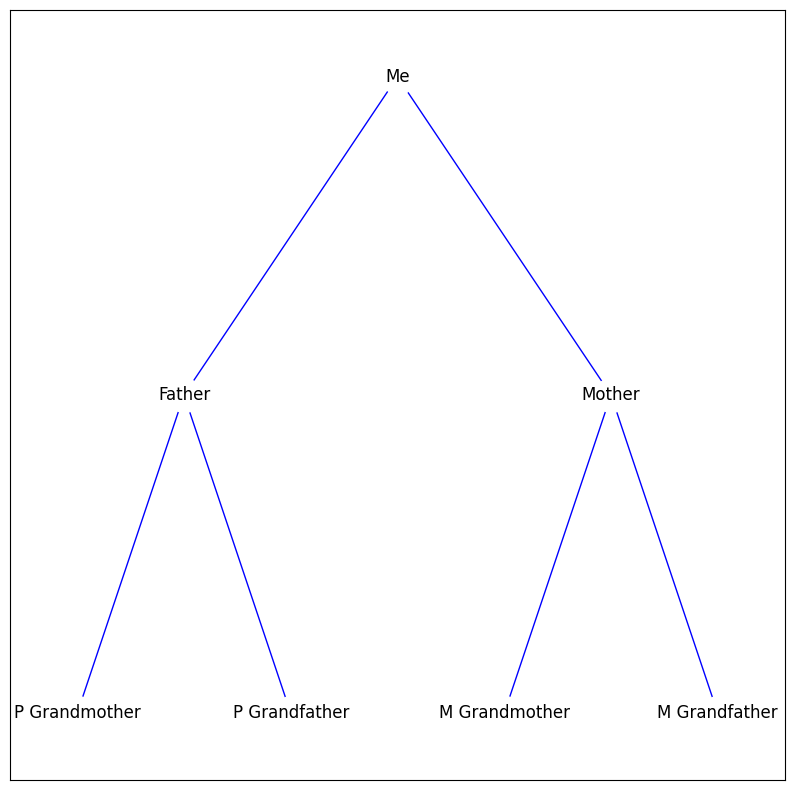

In [38]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


family = {'Me': ['Father', 'Mother'],
          'Father': ['P Grandmother', 'P Grandfather'],
          'Mother': ['M Grandmother', 'M Grandfather']
         }

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in family:
    G.add_node(f)
    for n in family[f]:
        G.add_edge(f,n)

pos = hierarchy_pos(G,'Me') 

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'white', node_size = 600, edge_color = 'b', pos = pos, with_labels = True)
plt.show()

## Defining a Graph

A **graph**, $G$ is a mathematical structure consisting of vertices, $V$, and edges, $E$. Where $V$ is the set of all vertices, and $E$ is the set of all edges. We denote our graph as $G = (V, E)$. Let us look at an exmaple: <br></br>
$$
\begin{align*}
    G(V, E) &= (\{v_1, v_2, v_3, v_4, v_5\}, \{e_1, e_2, e_3, e_4, e_5, e_6\}) \\
    V &= \{v_1, v_2, v_3, v_4, v_5\} \\
    E &= \{(v_1, v_2), (v_2, v_3), (v_2, v_5), (v_3, v_4), (v_4, v_5)\}
\end{align*}
$$
Where $e_1 = (v_1, v_2), e_2 = (v_2, v_3), e_3 = (v_2, v_4), e_4 = (v_4, v_4), e_5 = (v_4, v_5), e_6 = (v_5, v_1)$. 

Then we get the following graph:

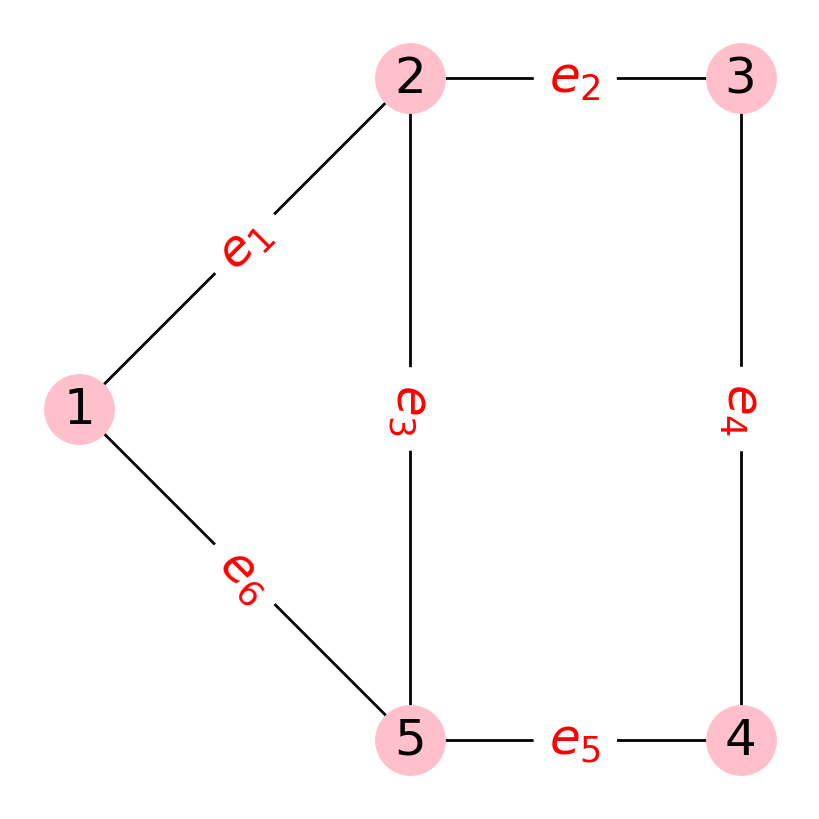

In [43]:
# Creating a graph with 5 vertices and 6 edges

edges = [[1, 2], [2, 3], [2, 5], [3, 4], [4, 5], [5, 1]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
#G.add_edges_from(edges) # Add edges to our graph 


G.add_node(1, level=0)
G.add_node(2, level=1)
G.add_node(5, level=1)
G.add_node(3, level=2)
G.add_node(4, level=2)

G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=2, linewidths=1,
    node_size = 2500, font_size = 36, node_color='pink', alpha=1,
    labels={node: node for node in G.nodes()} 
)

#pos = nx.spring_layout(G) # Position layout of G

# Draw the graph
# nx.draw(
#     G, pos, edge_color='black', width=1, linewidths=1,
#     node_size=500, node_color='pink', alpha=0.9,
#     labels={node: node for node in G.nodes()} 
# )

#  Add labels to the graph
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        (1, 2): '$e_1$', 
        (2, 3): '$e_2$', 
        (2, 5): '$e_3$',
        (3, 4): '$e_4$', 
        (4, 5): '$e_5$',
        (5, 1): '$e_6$'},
    font_color = 'red',
    font_size = 36
)

plt.show() # Show graph

In our example, edge $e_1$ has $v_1$ and $v_2$ as endpoints, so $e_1$ is **incident** with $v_1$ and $v_2$, and we say that $v_1$ and $v_2$ are adjacent since $(v_1, v_2) \in E$. This means that $v_1$ is also adjacent with $v_5$ and $e_6$ is incident with $v_1$ and $v_5$. We say that *two edges* are adjacent if they share a common endpoint, so $e_1$ is adjacent with $e_2, e_3, e_6$. 

We define the degree of a vertex by how many edges come out of the vertex. So $v_1$ is of degree $2$ since it is an endpoint for $e_1$ and $e_2$, while $v_5$ is degree $3$, and we denote this as $d(v_1) = 2$ and $d(v_2) = 3$. Note that $v_1, v_2, v_3, v_4, v_5$ are vertices that make up a cycle, since we start at $v_1$ and following our edges we end up back at $v_1$, so we have a cycle of 5. Note that there is also a cycle of 4 and cycle of 3 in the above graph. 

If there exists a vertex $v$ such that $d(v) = 0$, then we call that an **isolated vertex**, so in the following graph $v_2$ is an isolated vertex. We can also see that there is an edge $e_1 = (v_1, v_1)$ which is known as a **self-loop**. 

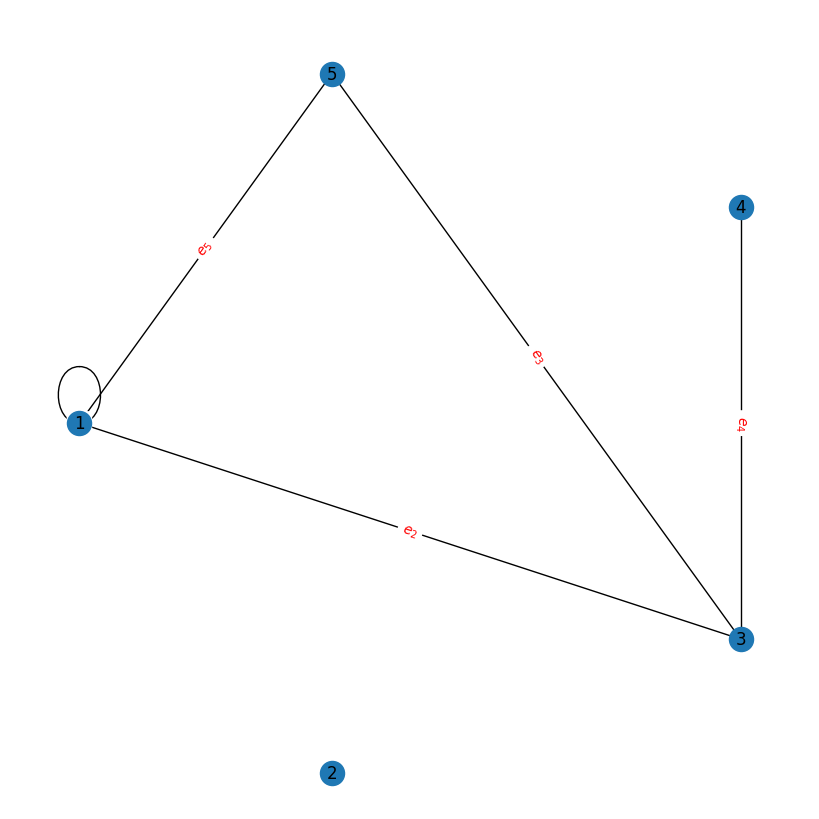

In [7]:
vertices = [1, 2, 3, 4, 5]
edges = [[1, 1], [1, 3], [3, 5], [3, 4], [5, 1]]
G = nx.MultiGraph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos = nx.shell_layout(G)
plt.figure()

nx.draw(
    G, pos, with_labels=True
)
        
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        (1, 1): '$e_1$', # Note sure how to change posiiton of label yet
        (1, 3): '$e_2$', 
        (3, 5): '$e_3$',
        (3, 4): '$e_4$', 
        (5, 1): '$e_5$'},
    font_color = 'red'
)

plt.axis('off')
plt.show()

## Subgraphs

Now let us talk about subgraphs. A **subgraphs** of a graph $G$ is a graph that is formed by a subset of the vertices and edges of $G$. The vertex subset of a subgraph needs to include all endpoints of the edge subset, but can include additional vertices. 

For example if we look at our graph above we have <br></br>

$$
G(V, E) = (\{v_1, v_2, v_3, v_4, v_5\}, \{e_1, e_2, e_3, e_4, e_5\})
$$

So we can create a subgraph <br></br>

$$
H(V', E') = (\{v_1, v_3, v_4, v_5\}, \{e_1, e_2, e_4\})
$$

Note that $\{v_1, v_3, v_5\} \subset \{v_1, v_2, v_3, v_4, v_\}$ and $\{e_1, e_2, e_4\} \subset \{e_1, e_2, e_3, e_4, e_5\}$ and each edge in $E'$ has its endpoints in $V'$, but $v_5$ is not an endpoint for any edge in $E'$. 

This means that can also denote $H$ as $H((G - \{v_2, v_4\}), (G - \{e_3, e_5\}))$. Which means that we remove vertex $v_2$ and $v_4$ from $G$ and remove edges $e_3$ and $e_5$ from $G$, which gets us $H$.

Since $H$ is subgraph of $G$, $G$ is a **supergraph** of $H$. So $H \subseteq G$. 

We can see graph $H$, below. 

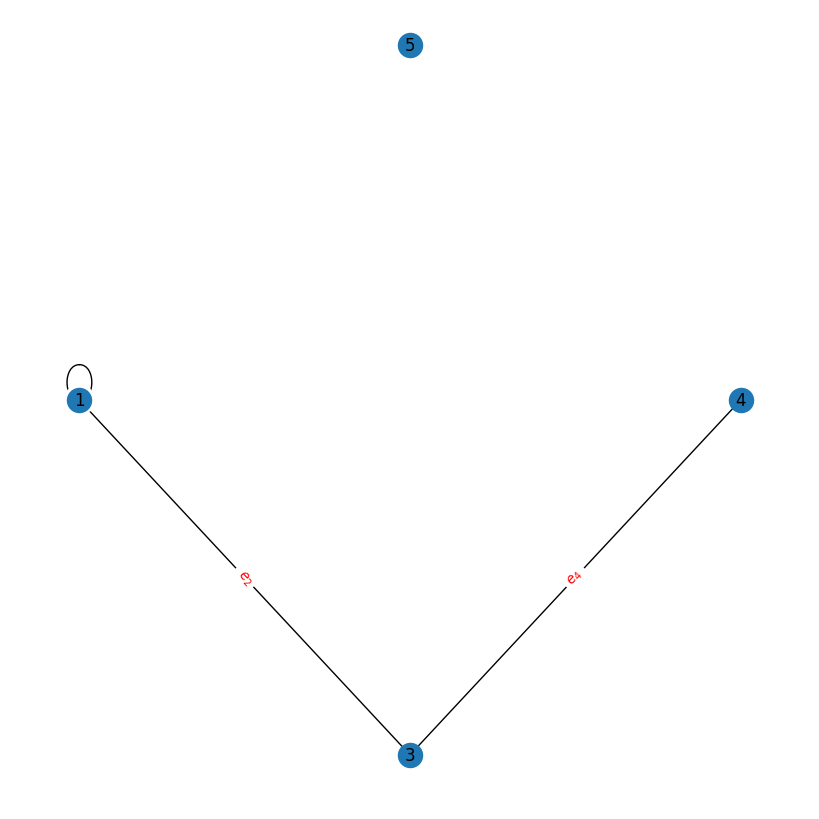

In [8]:
vertices = [1, 3, 4, 5]
edges = [[1, 1], [1, 3], [3, 4]]
G = nx.MultiGraph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
pos = nx.shell_layout(G)
plt.figure()

nx.draw(
    G, pos, with_labels=True
)
        
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        (1, 1): '$e_1$', # Note sure how to change posiiton of label yet
        (1, 3): '$e_2$', 
        (3, 4): '$e_4$'},
    font_color = 'red'
)

plt.axis('off')
plt.show()

## Types of Graphs

### Directed Graph

Every graph we have looked at so far is considered undirected, that is our edges have no direction. However, in some applications of graphs we needt o assigne a direction to each edge of a graph and we call these graphs **directed graphs** or a *digraph*. Below is an example of a digraph. 

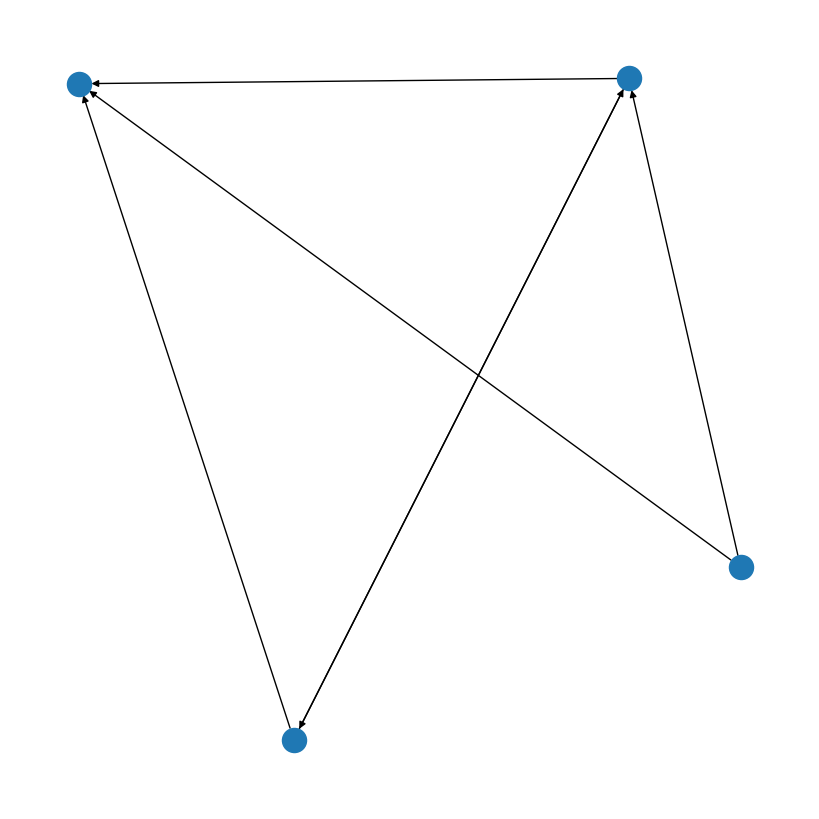

In [9]:
G = nx.gnp_random_graph(4, .5, seed=None, directed=True) # A random directed graph with 4 nodes and probably of 50% for edge creation

nx.draw(G)

plt.show()

With directed graphs we can associate a certain *weight*, or value to each edge. This has many applications and one of the most common problems using digraphs with weighted edges is the Traveling Salesmans problem which will be discussed more in the algorithms notebook. Below we have a directed graph in which the weight of the edges are denoted by color. 

/var/folders/pv/72244gc52qj45lcg1sfkgnh00000gn/T/ipykernel_65855/2340207920.py:14: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edges = nx.draw_networkx_edges(


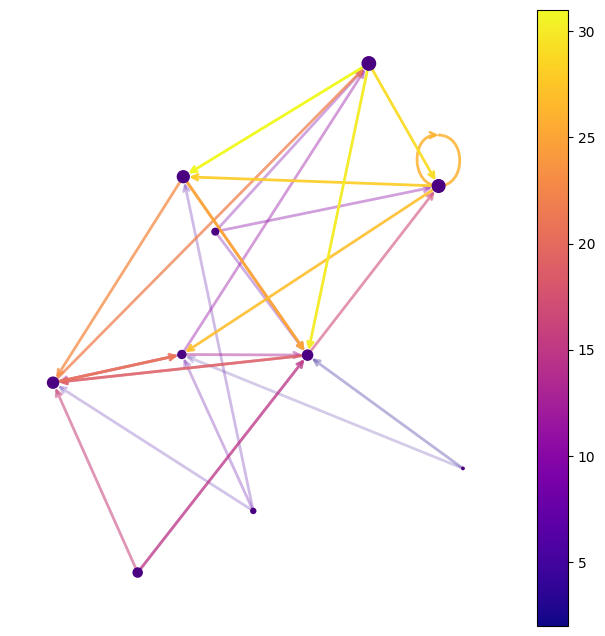

In [10]:
# From https://networkx.org/documentation/stable/auto_examples/drawing/plot_directed.html

seed = 13648  # Seed random number generators for reproducibility
G = nx.random_k_out_graph(10, 3, 0.5, seed=seed)
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax)
plt.show()

For a more practicle example let us look at a directed and weighted graph that depicts the cost of different flights where the weight is the cost. 

In [11]:
places = ['California', 'Colorado', 'Connecticut', 'New Hampshire']

df = pd.DataFrame([[0, 200, 600, 800], [250, 0, 525, 300], [775, 625, 0, 345], [900, 850, 300, 0]], places, places)

df

,California,Colorado,Connecticut,New Hampshire
California,0,200,600,800
Colorado,250,0,525,300
Connecticut,775,625,0,345
New Hampshire,900,850,300,0


### Connected Graph

A connected graph is a graph in which there is apath from $v_i$ to $v_j$, in other words we have one *component*, where a component is 

### Complete Graph

A **complete graph** is a graph in which every pair of *distinct* vertices defines an edge. In other words every vertex is adjacent to all other vertices. We denote the complete graph with $n$ vertices as $K_n$. Below we can see examples of $K_4$ and $K_5$.

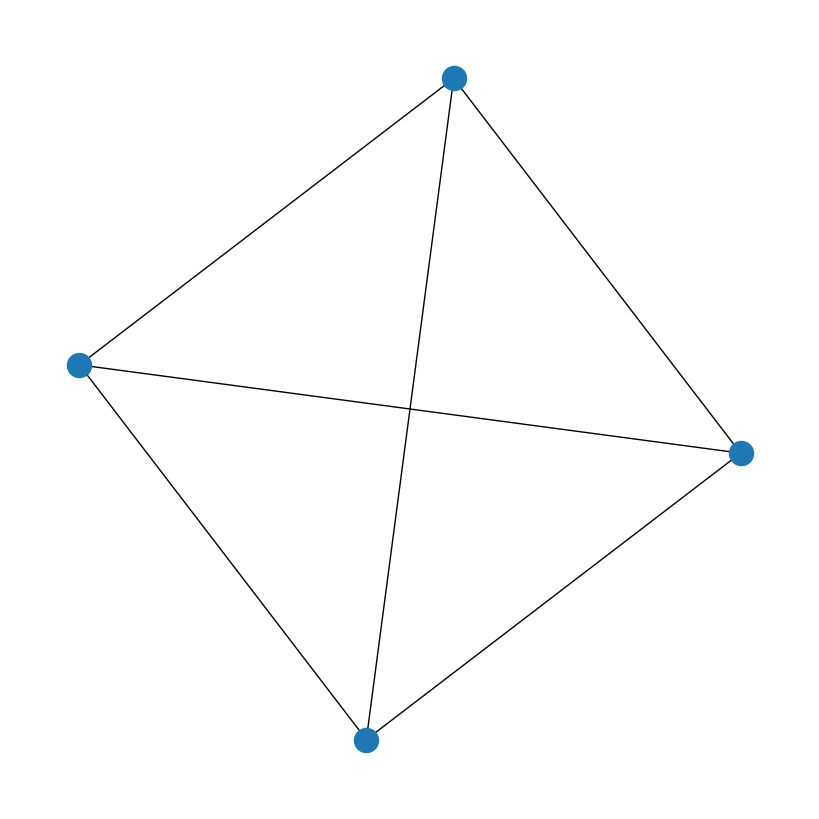

In [12]:
G = nx.complete_graph(4) # Generate a complete graph with 4 vertices

nx.draw(G)

plt.show()

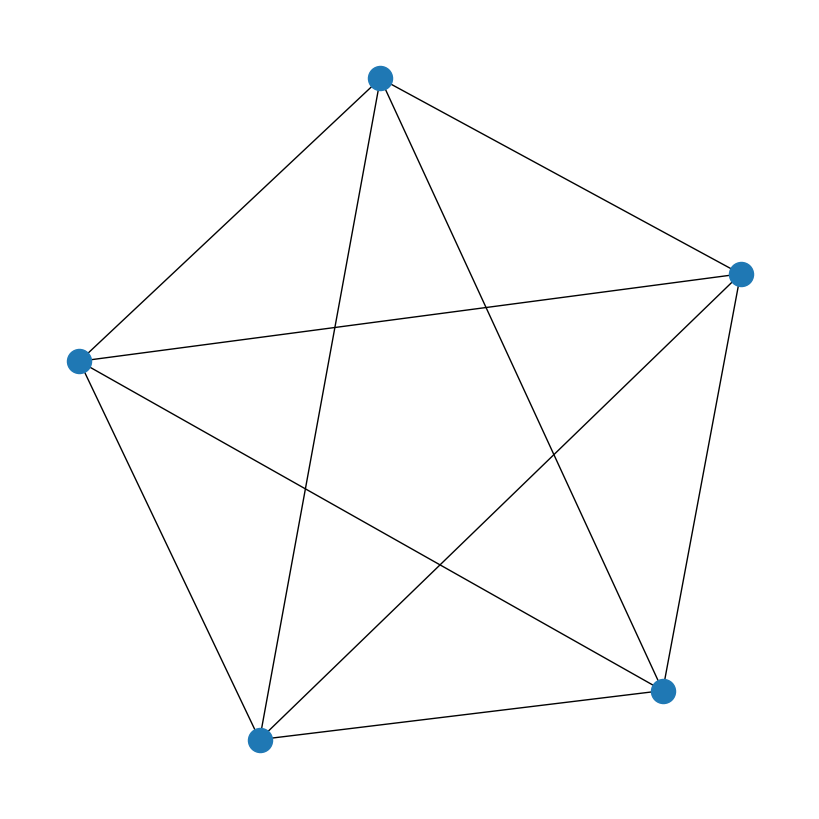

In [13]:
G = nx.complete_graph(5) # Generate a complete graph with 5 vertices

nx.draw(G)

plt.show()

### Regular Graph

A **regular graph** is a graph where all vertices have the same degree. So a graph that is *$k$-regular* is a graph in which every vertex is of degree $k$. Below are examples of 2-regular and 4-regular graphs.

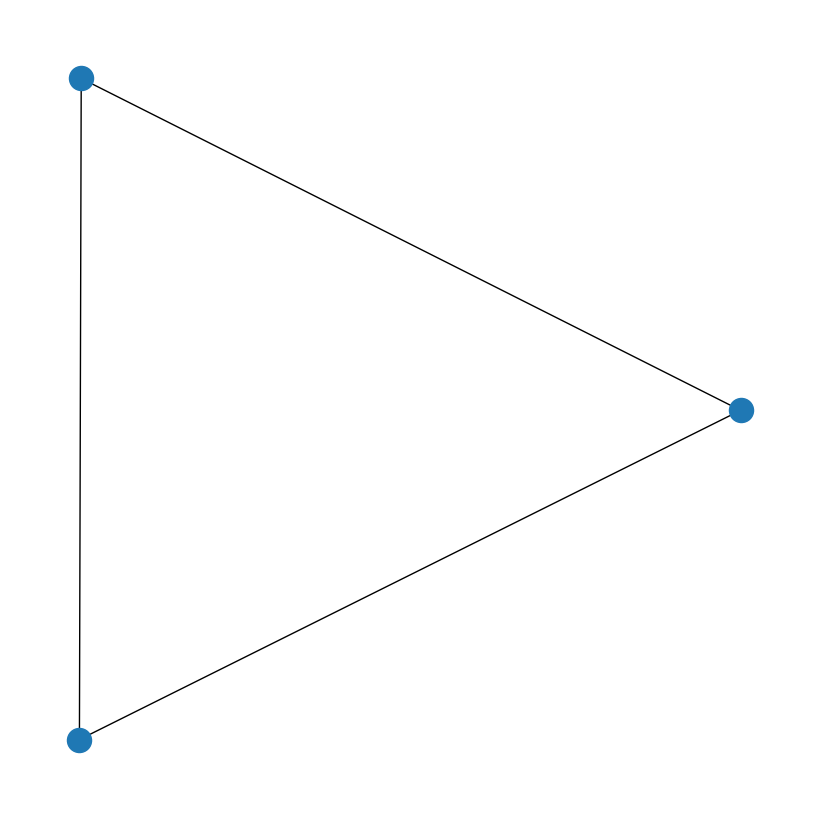

In [14]:
G = nx.random_regular_graph(2, 3, seed=None) # Regular graph of degree 2 with 3 vertices (also a complete graph)

nx.draw(G)

plt.show()

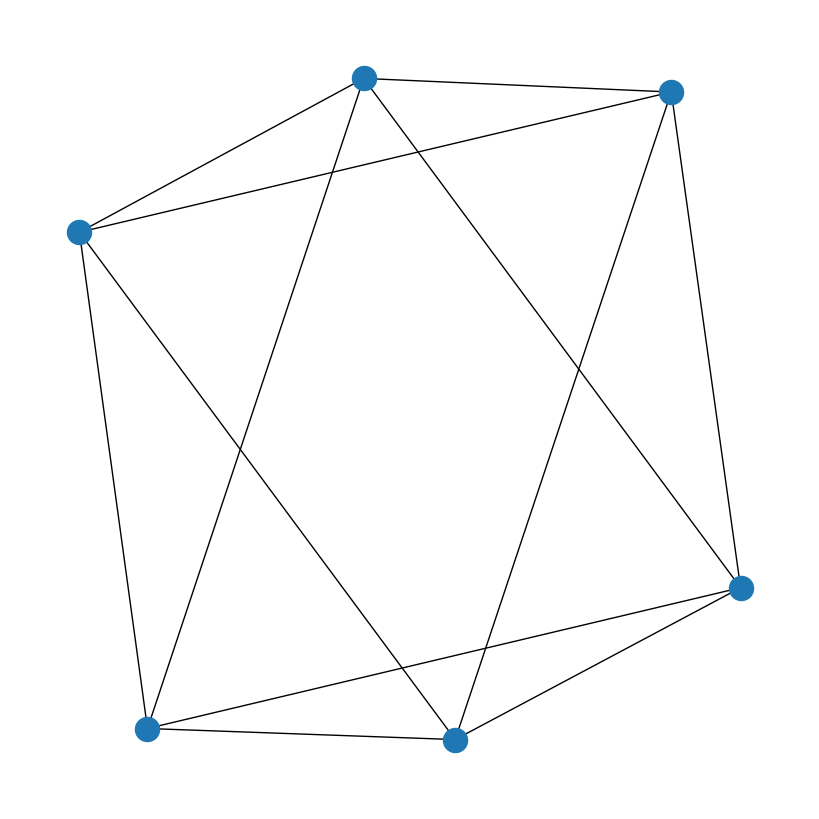

In [15]:
G = nx.random_regular_graph(4, 6, seed=None) # Regular graph with degree 4 on 6 vertices

nx.draw(G)

plt.show()

### Hypergraph

A finite **hypergraph**, $H = (X, \mathcal{E})$, where $X$ is the vertex-set and $\mathcal{E}$ is the hyperedge-set, is a graph where each $e_j \subseteq X$. 

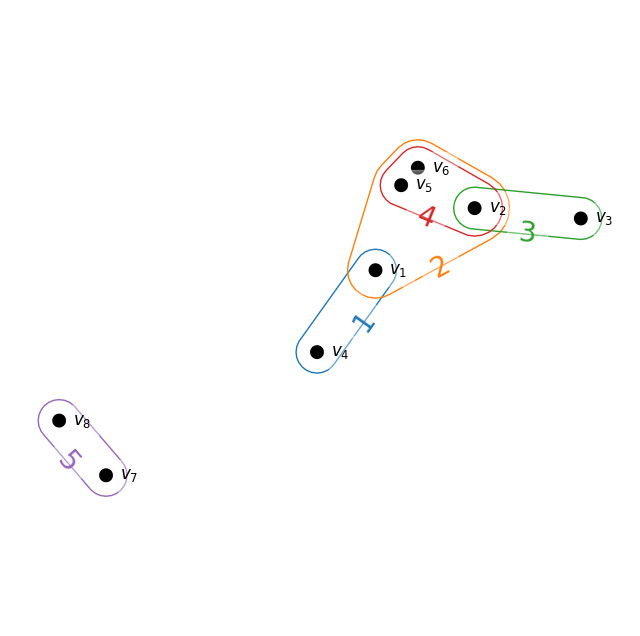

In [20]:
scenes = {
    1: ('$v_1$', '$v_4$'),
    2: ('$v_2$', '$v_1$', '$v_5$', '$v_6$'),
    3: ('$v_3$', '$v_2$'),
    4: ('$v_2$', '$v_5$', '$v_6$'),
    5: ('$v_7$', '$v_8$')
}

H = hnx.Hypergraph(scenes)



kwargs = {'layout_kwargs': {'seed': 60}, 'with_node_counts': False}

hnx.drawing.draw(H,
    node_labels_kwargs={
        'fontsize': 12
    },
    edge_labels_kwargs={
        'fontsize': 20
    },
    **kwargs
)

#plt.savefig('hypergraph_5.png')

### Intersection Graph

An intersection graph is a graph that reprsents the pattern of intersections. An **intersection graph** or **line graph** is a graph obtained by representing each set by a vertex, where two vertices are only connected if the corresponding sets intersect. In terms of a hypergraph, $H$, the intersection graph is denoted $L(H)$, and has a vertex-set corresponding to the hyperedges in $\mathcal{E}$ where $e_i$ and $e_j$ are only connected by an edge in $L(H)$ if and only if $e_i \cap e_j \neq \emptyset$. 

Below is the intersection graph for the hypergraph shown in the hypergraph section. 

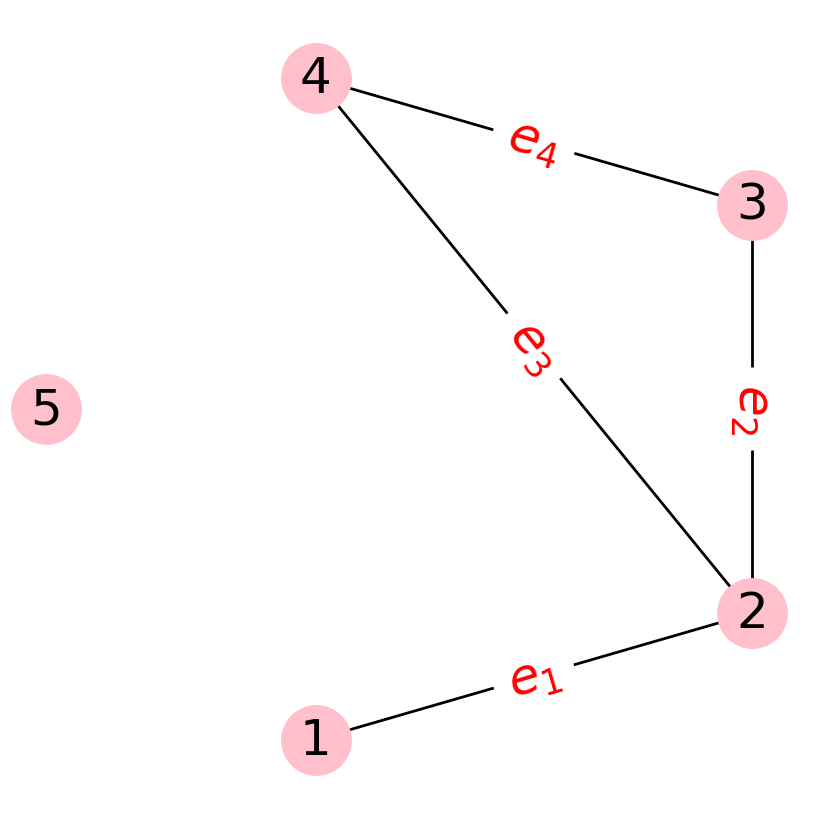

In [46]:
# Creating a intersection graph from hypergraph above
edges = [[1, 2], [2,3], [2, 4], [3, 4]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
G.add_node(5) # Add vertices
G.add_edges_from(edges) # Add edges to our graph 
pos = nx.shell_layout(G) # Position layout of G

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=2, linewidths=1,
    node_size=2500, font_size=36, node_color='pink', alpha=1,
    labels={node: node for node in G.nodes()} 
)

#  Add labels to the graph
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={
        (1, 2): '$e_1$', 
        (2, 3): '$e_2$', 
        (2, 4): '$e_3$',
        (3, 4): '$e_4$'}, 
    font_color = 'red',
    font_size = 36
)

#plt.savefig('intersection_hypergraph_5.png')

plt.savefig("intersectionHypergraph_5.png") # Show graph

### Chordal Graph

A **chordal graph** is a graph is a graph where every cycle of 4 or more has a chord, where a chord is a an edge connecting two non-consecutive vertices on the cycle. Chordal gaphs are a subset of perfect graphs had have many desirable properties. We will go in to chordal graphs and their relation to hypergraphs more extensively in <a href="ChordalGraphs.ipynb">Chordal Graphs</a>. Below is an example of a chordal graph with 8 vertices. 

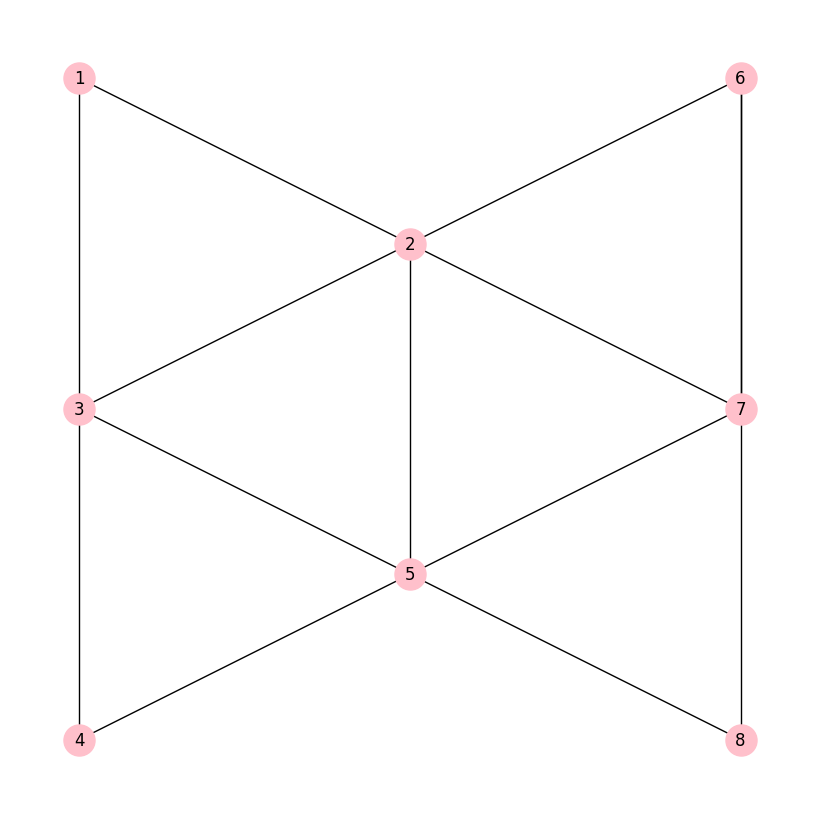

In [18]:
# Creating a graph with 5 vertices and 6 edges

edges = [[1, 2], [1, 3], [2, 3], [2, 5], [2, 6], [2, 7], [3, 4], [3, 5], [4, 5], [5, 7], [5, 8], [6, 7], [6, 8]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 

# Add nodes in specific levels
G.add_node(1, level=0)
G.add_node(3, level=0)
G.add_node(4, level=0)
G.add_node(2, level=1)
G.add_node(5, level=1)
G.add_node(6, level=2)
G.add_node(7, level=2)
G.add_node(8, level=2)

G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=1,
    labels={node: node for node in G.nodes()} 
)

# #  Add labels to the graph
# nx.draw_networkx_edge_labels(
#     G, pos,
#     edge_labels={
#         (1, 2): '$e_1$', 
#         (2, 3): '$e_2$', 
#         (2, 5): '$e_3$',
#         (3, 4): '$e_4$', 
#         (4, 5): '$e_5$',
#         (5, 1): '$e_6$'},
#     font_color = 'red'
# )

plt.show() # Show graph

### Trees

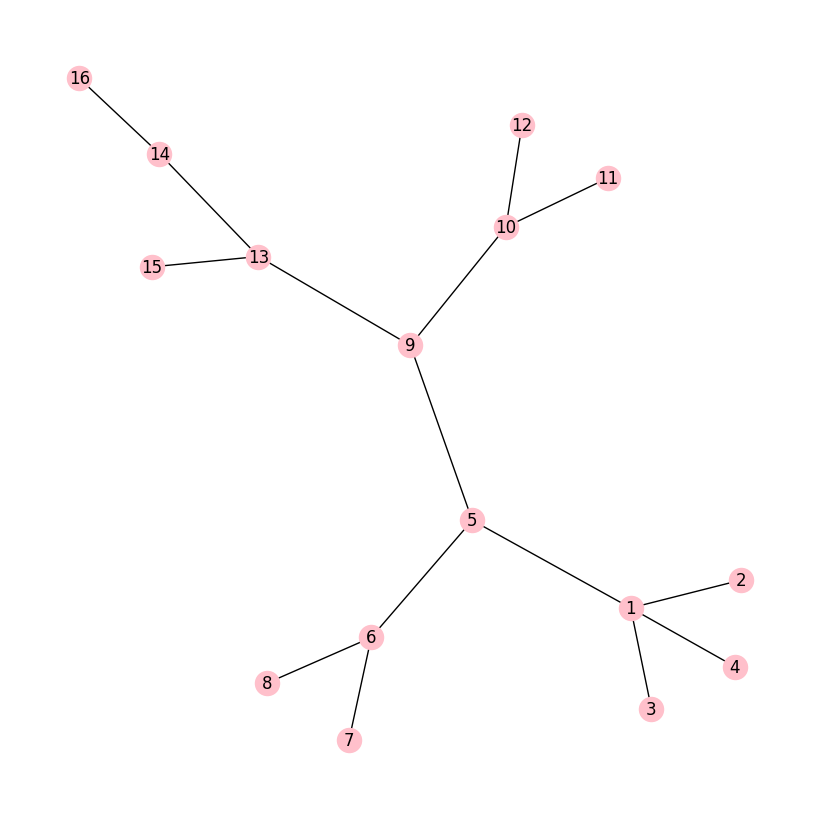

In [94]:
edges = [[1, 2], [1, 3], [1, 4], [1, 5], [5, 6], [6, 7], [6, 8], [9, 5], [9, 10], [9, 13], [10, 11], [10, 12], [13, 14], [13, 15], [14, 16]]

G = nx.Graph()

G.add_edges_from(edges)
pos = nx.planar_layout(G)

nx.draw(G, node_color='pink', with_labels = True)

plt.savefig("tree.png")

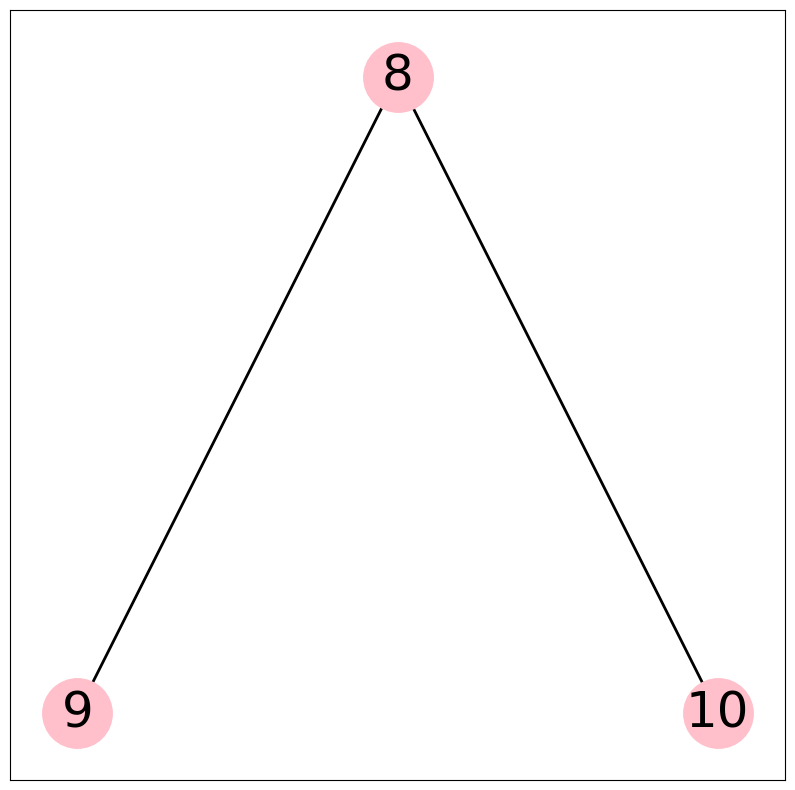

In [33]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)


nodes = {#1: [2, 3, 4],
         #2: [5, 6],
         #3: [7],
         #4: [8],
         8: [9, 10]
        }

G = nx.Graph()

# Make a graph with .add_node(nodes) and .add_edge(node1, node2)

for f in nodes:
    G.add_node(f)
    for n in nodes[f]:
        G.add_edge(f,n, length=0.5)

pos = hierarchy_pos(G, 8)
#pos = get_geometric_layout(nodes, edge_length)

plt.figure(3,figsize=(10,10)) 
nx.draw_networkx(G, node_color = 'pink', node_size = 2500, edge_color = 'black', width = 2, pos = pos, font_size=36, with_labels = True)
plt.savefig("R5.png")

NameError: name 's' is not defined

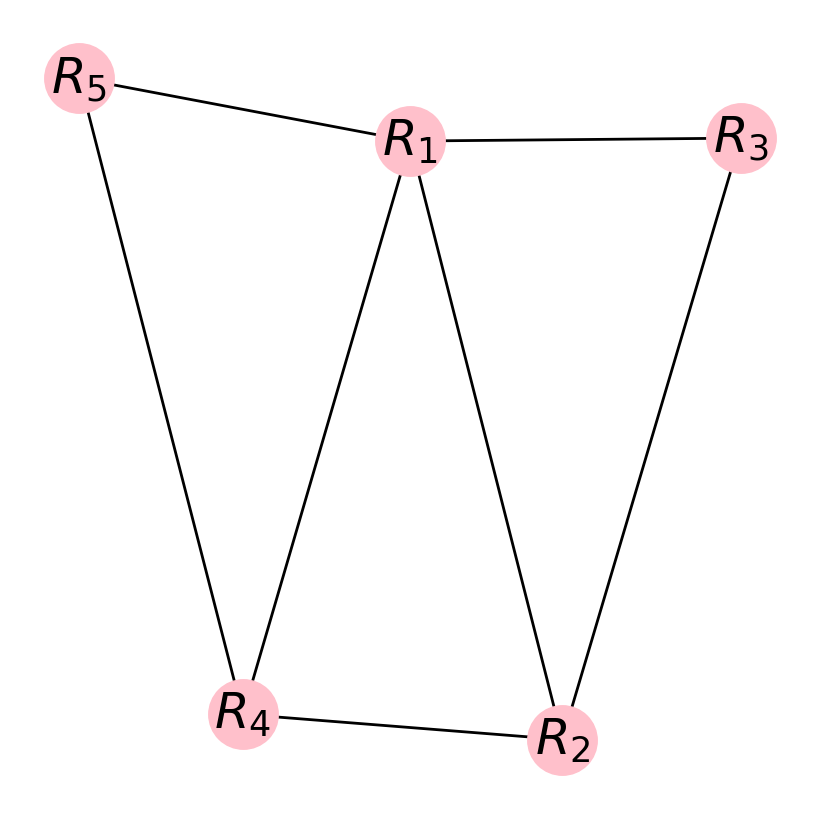

In [58]:
# Creating a intersection graph from hypergraph above
edges = [['$R_1$', '$R_2$'], ['$R_1$', '$R_3$'], ['$R_1$', '$R_4$'], ['$R_1$', '$R_5$'], ['$R_2$', '$R_3$'], ['$R_2$', '$R_4$'], ['$R_4$', '$R_5$']] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
G.add_edges_from(edges) # Add edges to our graph 
pos = nx.spring_layout(G) # Position layout of G

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=2, linewidths=1,
    node_size=2500, font_size=36, node_color='pink', alpha=1,
    labels={node: node for node in G.nodes()} 
)
s
#plt.savefig('intersection_hypergraph_5.png')

#plt.savefig("intersectionFamilySubtrees.png") # Show graph